In [150]:
from imports import *
from tools import *

In [151]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'
table = QTable.read('%s/data_hstha_nebulae_catalogue/all/nebulae_catalogue_wclusters_wprops.fits' %root_dir)
print('Number of regions: %i' %len(table))

# Get HII region mask
mask = table['HII_class_v3_MUSE'] == 1
table = table[mask]
print('Number of HII regions: %i' %len(table))

# Get age mask
age = table['reg_dolflux_Age_MinChiSq'].value
age_ = table['reg_dolflux_Age_MinChiSq_massweighted'].value
age[~age_.mask] = age_[~age_.mask]
mask = age <= 5
table = table[mask]
print('Number of regions <5 Myr: %i' %len(table))

radius_circ_pc  = np.log10(table['radius_circ_pc'].value)
radius_mom_pc   = np.log10(table['mean_sigma_pc'].value)
radius_strom_pc = np.log10(table['radius_strom_pc'].value)

raduis_eff = table['r_reff_MUSE'].value

Pdir_circ  = np.log10(table['Pdir_circ'].value)
Pdir_mom   = np.log10(table['Pdir_mom'].value)
Pdir_strom = np.log10(table['Pdir_strom'].value) 
Ptherm     = np.log10(table['Ptherm'].value)

Pdir_circ_Lbol_KE12  = np.log10(table['Pdir_circ_Lbol_KE12'].value)
Pdir_circ_Lbol_B21  = np.log10(table['Pdir_circ_Lbol_B21'].value)

mass = np.log10(table['reg_dolflux_Mass_MinChiSq'].value)
age = table['reg_dolflux_Age_MinChiSq'].value

mass_ = np.log10(table['reg_dolflux_Mass_MinChiSq_sum'].value)
age_ = table['reg_dolflux_Age_MinChiSq_massweighted'].value
mass[~mass_.mask] = mass_[~mass_.mask]
age[~age_.mask] = age_[~age_.mask]

sii = table['SII6716_FLUX_CORR_MUSE'].value
siii = table['SIII9068_FLUX_CORR_MUSE'].value
sii_err = table['SII6716_FLUX_CORR_ERR_MUSE'].value
siii_err = table['SIII9068_FLUX_CORR_ERR_MUSE'].value

s_mask = (sii > 0) & (siii > 0) & (siii/sii > 0) & (sii/sii_err>3) & (siii/siii_err>3)
ratio_siii_sii = np.log10(siii/sii)

ebv = table['EBV_MUSE'].value

Number of regions: 5466
Number of HII regions: 5151
Number of regions <5 Myr: 2518


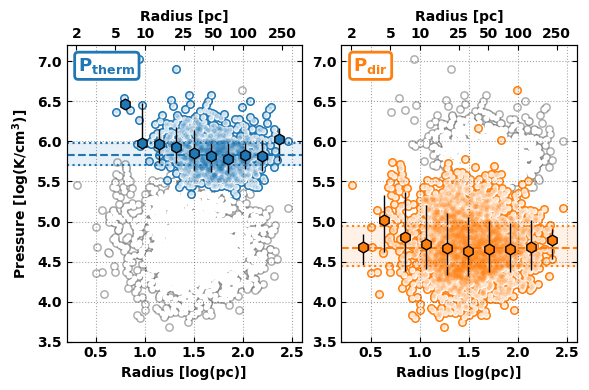

In [152]:
data_x1 = radius_circ_pc
data_y1 = Ptherm
data_x2 = radius_circ_pc
data_y2 = Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, (ax, data_x, data_y) in enumerate(zip([ax1, ax2], [data_x1, data_x2], [data_y1, data_y2])):

    ax.scatter(data_x, data_y, s=30, c='C%i' %i, rasterized=True)
    ax.scatter(data_x, data_y, s=10, c='white', rasterized=True)
    ax.scatter(data_x, data_y, s=12, alpha=0.2, rasterized=True, fc='C%i'%i, ec='none')

    x, y, stats, bins = get_bins_1d(data_x, data_y)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)


for i, (ax, data_x, data_y) in enumerate(zip([ax2, ax1], [data_x1, data_x2], [data_y1, data_y2])):

    ax.scatter(data_x, data_y, s=30, c='gray', rasterized=True, zorder=0, alpha=0.5)
    ax.scatter(data_x, data_y, s=10, c='white', rasterized=True, zorder=0)

for ax in [ax1, ax2]: 

    ax.set_xlim(0.2, 2.6)
    ax.set_ylim(3.5, 7.2)
    ax.set_xlabel('Radius [log(pc)]')

    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())
    new_tick_locations = np.log10([2,5,10,25,50,100,250])
    ax3.set_xticks(new_tick_locations)
    ax3.set_xticklabels(np.round(np.power(10, new_tick_locations)).astype(int))
    ax3.set_xlabel('Radius [pc]')
    ax.grid(True, alpha=0.35, ls=':', color='black')

ax1.set_ylabel('Pressure [log(K/cm$^3$)]')

ax1.text(0.05, 0.965, 'P$_\mathrm{therm}$', size=13, va='top', ha='left', weight='heavy', color='C0', transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='C0', boxstyle='round,pad=0.2', linewidth=2))
ax2.text(0.05, 0.965, 'P$_\mathrm{dir}$', size=13, va='top', ha='left', weight='heavy', color='C1', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='C1', boxstyle='round,pad=0.2', linewidth=2))

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/scatter_prad.pdf', dpi=200, bbox_inches='tight')

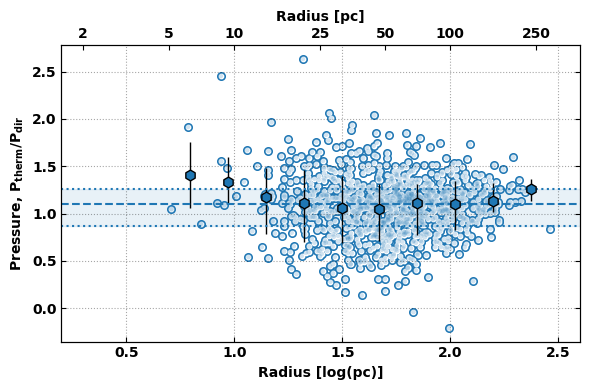

In [164]:
data_x1 = radius_circ_pc
data_y1 = Ptherm - Pdir_circ

fig = plt.figure(figsize=(6, 4)) 
ax1 = fig.add_subplot(111)

for i, (ax, data_x, data_y) in enumerate(zip([ax1], [data_x1], [data_y1])):

    ax.scatter(data_x, data_y, s=30, c='C%i' %i, rasterized=True)
    ax.scatter(data_x, data_y, s=10, c='white', rasterized=True)
    ax.scatter(data_x, data_y, s=12, alpha=0.2, rasterized=True, fc='C%i'%i, ec='none')

    x, y, stats, bins = get_bins_1d(data_x, data_y)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=60, ec='black', zorder=10, marker='h', c='C%i'%i)

    p1, med, p2 = np.percentile(data_y, [25, 50, 75])
    ax.axhline(med, color='C%i'%i, lw=1.5, ls='--')
    ax.axhline(p1, color='C%i'%i, lw=1.5, ls=':')
    ax.axhline(p2, color='C%i'%i, lw=1.5, ls=':')
    ax.fill_between([-1,1e3], p1, p2, color='C%i'%i, alpha=0.1)

for ax in [ax1]: 

    ax.set_xlim(0.2, 2.6)
    # ax.set_ylim(3.5, 7.2)
    ax.set_xlabel('Radius [log(pc)]')

    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())
    new_tick_locations = np.log10([2,5,10,25,50,100,250])
    ax3.set_xticks(new_tick_locations)
    ax3.set_xticklabels(np.round(np.power(10, new_tick_locations)).astype(int))
    ax3.set_xlabel('Radius [pc]')
    ax.grid(True, alpha=0.35, ls=':', color='black')

ax1.set_ylabel('Pressure, P$_\mathrm{therm}$/P$_\mathrm{dir}$')

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/scatter_prad_pratio.pdf', dpi=200, bbox_inches='tight')

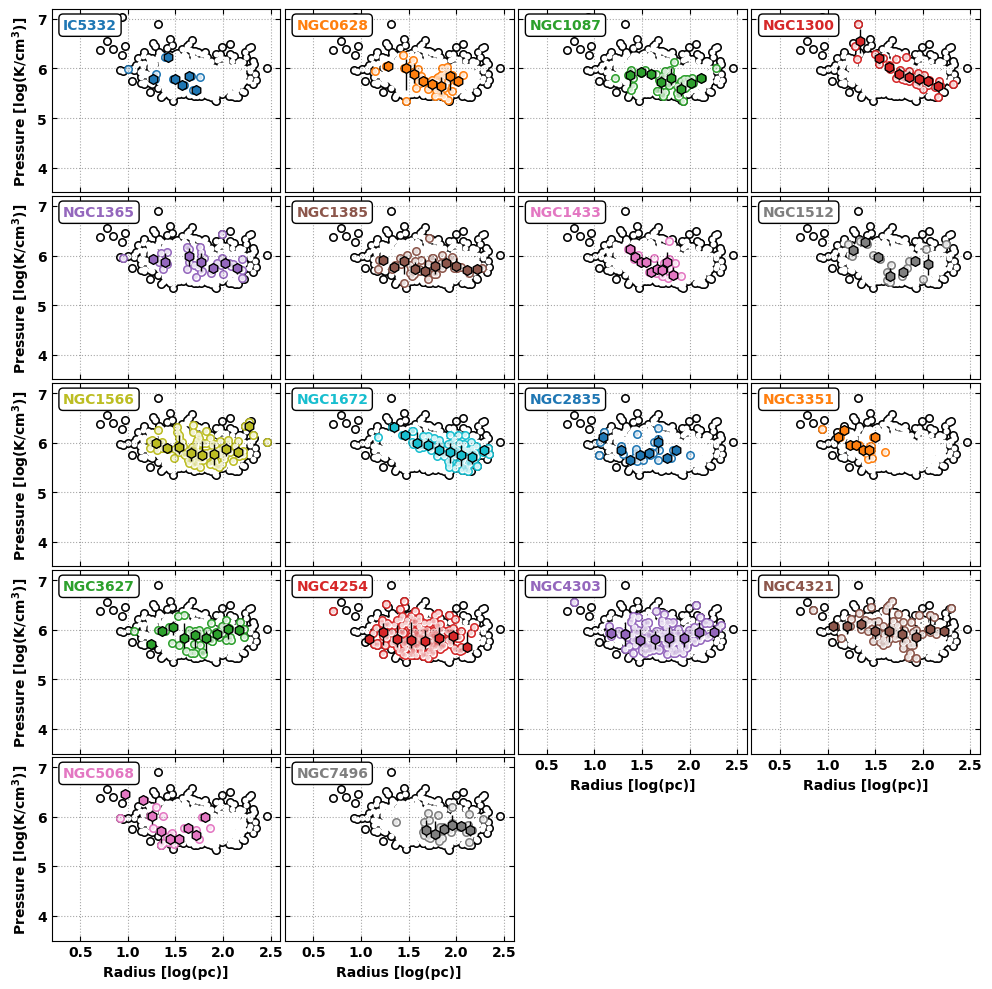

In [153]:
data_x = radius_circ_pc
data_y = Ptherm

fig = plt.figure(figsize=(10, 10)) 
gal_names = np.unique(table['gal_name'])

for i, gal_name in enumerate(gal_names):

    ax = fig.add_subplot(5,4,i+1)

    ax.scatter(data_x, data_y, s=30, c='black', rasterized=True, zorder=0)
    ax.scatter(data_x, data_y, s=10, c='white', rasterized=True, zorder=0) 

    mask_gal = table['gal_name'] == gal_name
    data_x_, data_y_ = data_x[mask_gal], data_y[mask_gal]

    ax.scatter(data_x_, data_y_, s=30, c='C%i' %i, rasterized=True)
    ax.scatter(data_x_, data_y_, s=10, c='white', rasterized=True)
    ax.scatter(data_x_, data_y_, s=12, alpha=0.2, rasterized=True, fc='C%i'%i, ec='none')

    x, y, stats, bins = get_bins_1d(data_x_, data_y_, nbins=10)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=50, ec='black', fc='C%i' %i, zorder=10, marker='h')

    ax.set_xlim(0.2, 2.6)
    ax.set_ylim(3.5, 7.2)
    ax.grid(True, alpha=0.35, ls=':', color='black')
    ax.text(0.05, 0.95, gal_name, ha='left', va='top', bbox=dict(facecolor='white', boxstyle='round', alpha=1), transform=ax.transAxes, color='C%i'%i)

    if i in [14,15,16,17]:
        ax.set_xlabel('Radius [log(pc)]')
    else: 
        ax.set_xticklabels([])
    if i in [0,4,8,12,16]:
        ax.set_ylabel('Pressure [log(K/cm$^3$)]')
    else:
        ax.set_yticklabels([])
        

fig.tight_layout(h_pad=0.1, w_pad=0.1)
fig.subplots_adjust(wspace=0.02, hspace=0.02)

plt.savefig('./figs/scatter_prad_ptherm_gal.pdf', dpi=200, bbox_inches='tight')

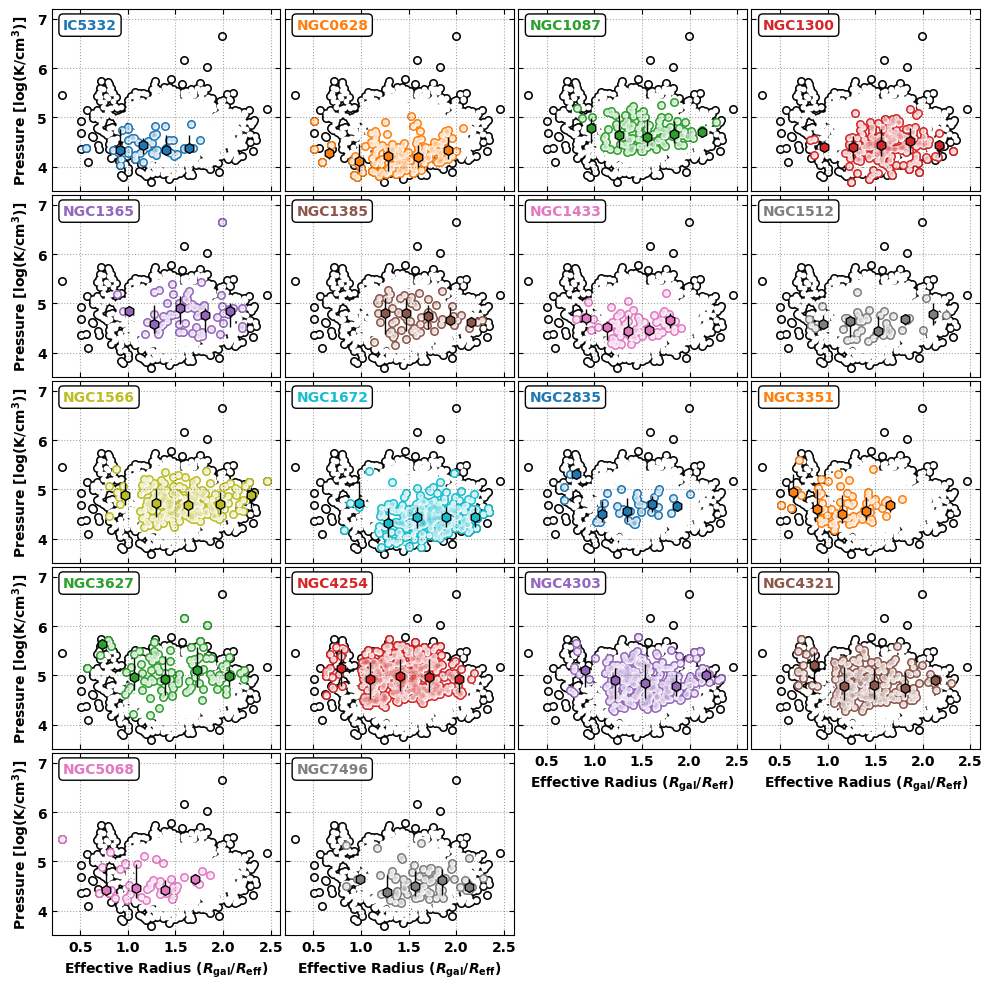

In [154]:
data_x = radius_circ_pc
data_y = Pdir_circ

fig = plt.figure(figsize=(10, 10)) 
gal_names = np.unique(table['gal_name'])

for i, gal_name in enumerate(gal_names):

    ax = fig.add_subplot(5,4,i+1)

    ax.scatter(data_x, data_y, s=30, c='black', rasterized=True, zorder=0)
    ax.scatter(data_x, data_y, s=10, c='white', rasterized=True, zorder=0) 

    mask_gal = table['gal_name'] == gal_name
    data_x_, data_y_ = data_x[mask_gal], data_y[mask_gal]

    ax.scatter(data_x_, data_y_, s=30, c='C%i' %i, rasterized=True)
    ax.scatter(data_x_, data_y_, s=10, c='white', rasterized=True)
    ax.scatter(data_x_, data_y_, s=12, alpha=0.2, rasterized=True, fc='C%i'%i, ec='none')

    x, y, stats, bins = get_bins_1d(data_x_, data_y_, nbins=5)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=50, ec='black', fc='C%i' %i, zorder=10, marker='h')

    ax.set_xlim(0.2, 2.6)
    ax.set_ylim(3.5, 7.2)
    ax.grid(True, alpha=0.35, ls=':', color='black')
    ax.text(0.05, 0.95, gal_name, ha='left', va='top', bbox=dict(facecolor='white', boxstyle='round', alpha=1), transform=ax.transAxes, color='C%i'%i)

    if i in [14,15,16,17]:
        ax.set_xlabel('Effective Radius ($R_\mathrm{gal}/R_\mathrm{eff}$)')
    else: 
        ax.set_xticklabels([])
    if i in [0,4,8,12,16]:
        ax.set_ylabel('Pressure [log(K/cm$^3$)]')
    else:
        ax.set_yticklabels([])
        

fig.tight_layout(h_pad=0.1, w_pad=0.1)
fig.subplots_adjust(wspace=0.02, hspace=0.02)

plt.savefig('./figs/scatter_prgal_pdir_gal.pdf', dpi=200, bbox_inches='tight')

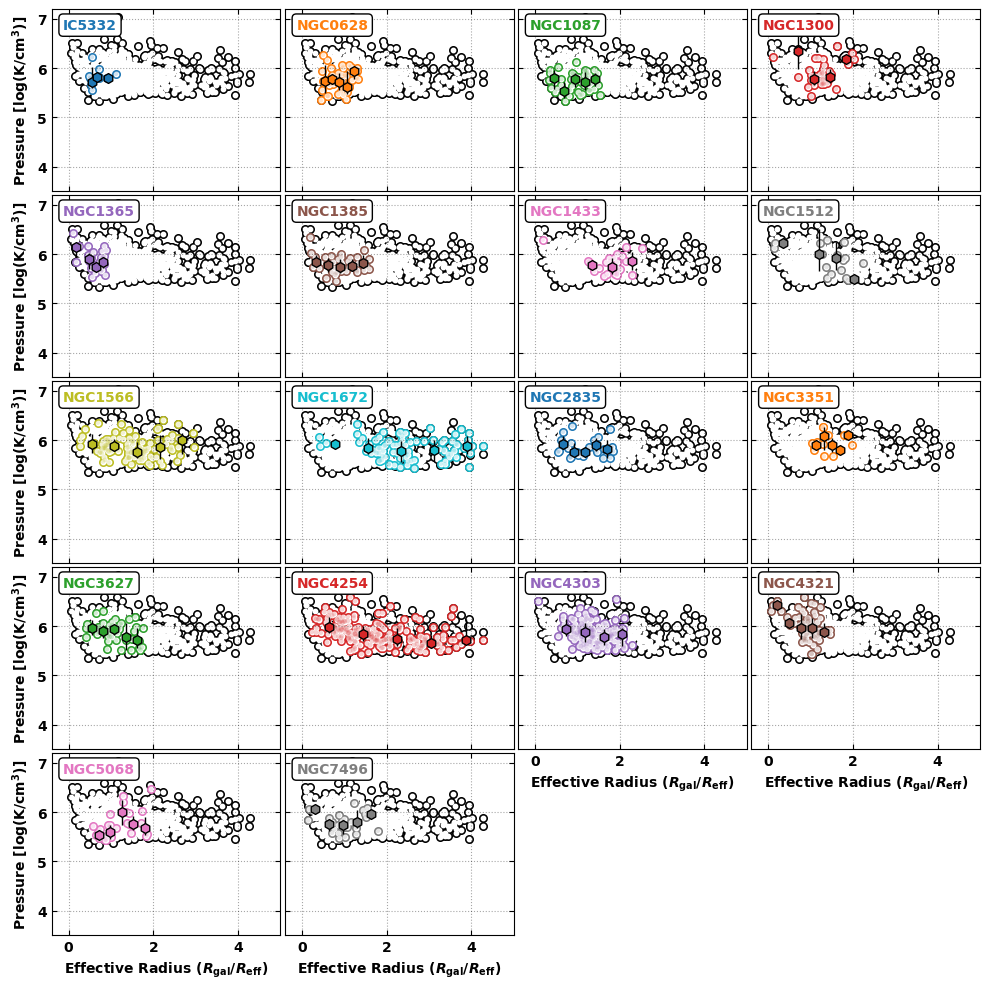

In [155]:
data_x = raduis_eff
data_y = Ptherm

fig = plt.figure(figsize=(10, 10)) 
gal_names = np.unique(table['gal_name'])

for i, gal_name in enumerate(gal_names):

    ax = fig.add_subplot(5,4,i+1)

    ax.scatter(data_x, data_y, s=30, c='black', rasterized=True, zorder=0)
    ax.scatter(data_x, data_y, s=10, c='white', rasterized=True, zorder=0) 

    mask_gal = table['gal_name'] == gal_name
    data_x_, data_y_ = data_x[mask_gal], data_y[mask_gal]

    ax.scatter(data_x_, data_y_, s=30, c='C%i' %i, rasterized=True)
    ax.scatter(data_x_, data_y_, s=10, c='white', rasterized=True)
    ax.scatter(data_x_, data_y_, s=12, alpha=0.2, rasterized=True, fc='C%i'%i, ec='none')

    x, y, stats, bins = get_bins_1d(data_x_, data_y_, nbins=5)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=50, ec='black', fc='C%i' %i, zorder=10, marker='h')

    ax.set_xlim(-0.4, 5)
    ax.set_ylim(3.5, 7.2)
    ax.grid(True, alpha=0.35, ls=':', color='black')
    ax.text(0.05, 0.95, gal_name, ha='left', va='top', bbox=dict(facecolor='white', boxstyle='round', alpha=1), transform=ax.transAxes, color='C%i'%i)

    if i in [14,15,16,17]:
        ax.set_xlabel('Effective Radius ($R_\mathrm{gal}/R_\mathrm{eff}$)')
    else: 
        ax.set_xticklabels([])
    if i in [0,4,8,12,16]:
        ax.set_ylabel('Pressure [log(K/cm$^3$)]')
    else:
        ax.set_yticklabels([])
        
fig.tight_layout(h_pad=0.1, w_pad=0.1)
fig.subplots_adjust(wspace=0.02, hspace=0.02)

plt.savefig('./figs/scatter_prgal_ptherm_gal.pdf', dpi=200, bbox_inches='tight')

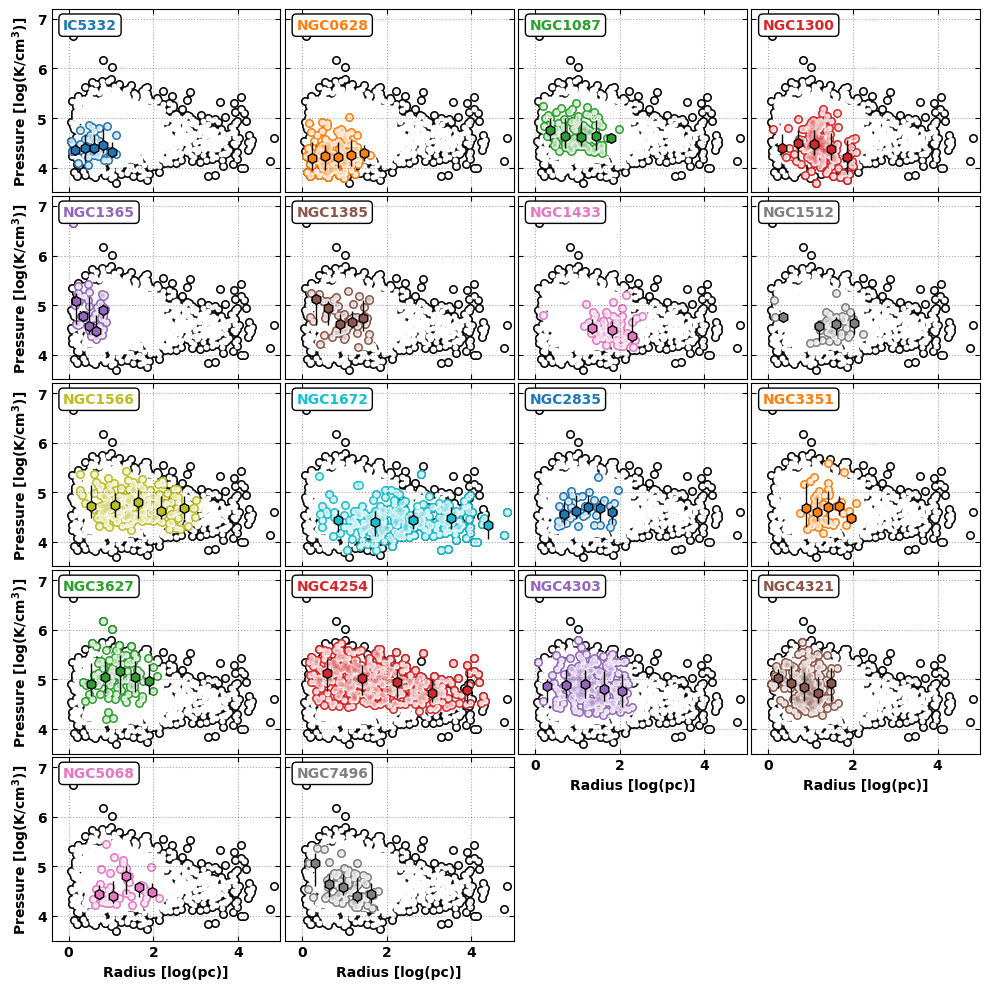

In [156]:
data_x = raduis_eff
data_y = Pdir_circ

fig = plt.figure(figsize=(10, 10)) 
gal_names = np.unique(table['gal_name'])

for i, gal_name in enumerate(gal_names):

    ax = fig.add_subplot(5,4,i+1)

    ax.scatter(data_x, data_y, s=30, c='black', rasterized=True, zorder=0)
    ax.scatter(data_x, data_y, s=10, c='white', rasterized=True, zorder=0) 

    mask_gal = table['gal_name'] == gal_name
    data_x_, data_y_ = data_x[mask_gal], data_y[mask_gal]

    ax.scatter(data_x_, data_y_, s=30, c='C%i' %i, rasterized=True)
    ax.scatter(data_x_, data_y_, s=10, c='white', rasterized=True)
    ax.scatter(data_x_, data_y_, s=12, alpha=0.2, rasterized=True, fc='C%i'%i, ec='none')

    x, y, stats, bins = get_bins_1d(data_x_, data_y_, nbins=5)
    ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
    ax.scatter(x, y, s=50, ec='black', fc='C%i' %i, zorder=10, marker='h')

    ax.set_xlim(-0.4, 5)
    ax.set_ylim(3.5, 7.2)
    ax.grid(True, alpha=0.35, ls=':', color='black')
    ax.text(0.05, 0.95, gal_name, ha='left', va='top', bbox=dict(facecolor='white', boxstyle='round', alpha=1), transform=ax.transAxes, color='C%i'%i)

    if i in [14,15,16,17]:
        ax.set_xlabel('Radius [log(pc)]')
    else: 
        ax.set_xticklabels([])
    if i in [0,4,8,12,16]:
        ax.set_ylabel('Pressure [log(K/cm$^3$)]')
    else:
        ax.set_yticklabels([])
        

fig.tight_layout(h_pad=0.1, w_pad=0.1)
fig.subplots_adjust(wspace=0.02, hspace=0.02)

plt.savefig('./figs/scatter_prgal_pdir_gal.pdf', dpi=200, bbox_inches='tight')